**Description**: Analyze accuracies for $m = 50, n = 200$.

**Estimated runtime**: ~1 hour. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 200

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

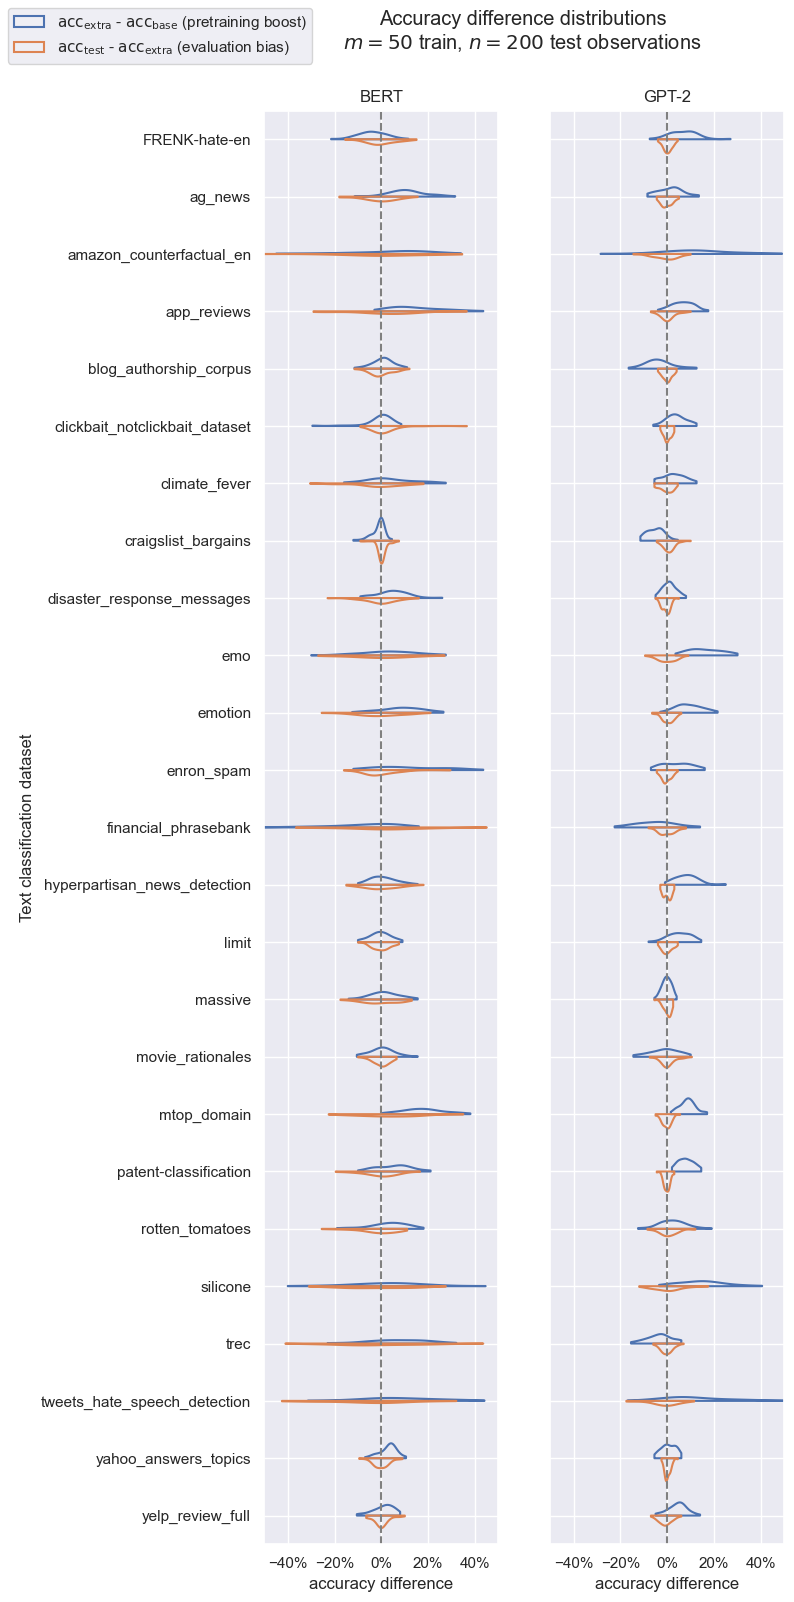

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Pretraining boost

In [7]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.041472 ┆ 0.009387 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.226085 ┆ 0.061191 │
└──────────┴──────────┘


In [8]:
summary_boost

dataset,mean,se
"""FRENK-hate-en""",0.0148,0.011473
"""ag_news""",0.0607,0.011822
"""amazon_counterfactual_en""",0.08235,0.024264
"""app_reviews""",0.1043,0.013154
"""blog_authorship_corpus""",-0.01475,0.008178
…,…,…
"""silicone""",0.08515,0.020418
"""trec""",0.02,0.015501
"""tweets_hate_speech_detection""",0.10225,0.021577
"""yahoo_answers_topics""",0.01755,0.005065


In [9]:
summary_relative_boost

dataset,mean,se
"""FRENK-hate-en""",0.044675,0.022722
"""ag_news""",0.121846,0.025302
"""amazon_counterfactual_en""",0.194501,0.053531
"""app_reviews""",0.804704,0.114815
"""blog_authorship_corpus""",-0.022265,0.015686
…,…,…
"""silicone""",0.306946,0.062888
"""trec""",0.112275,0.06396
"""tweets_hate_speech_detection""",0.242254,0.055469
"""yahoo_answers_topics""",0.232303,0.055575


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 924 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.09483,0.14128,-0.11801,0.32784,0.00295,0.00209,2296.86740,2698.38505,1.00147
1|dataset:method[FRENK-hate-en:extra],-0.07527,0.14053,-0.29306,0.14580,0.00286,0.00207,2431.62918,2594.03171,1.00121
1|dataset:method[ag_news:base],-0.00140,0.14037,-0.22856,0.21280,0.00351,0.00249,1548.80353,2331.34383,1.00046
1|dataset:method[ag_news:extra],0.01479,0.14051,-0.21006,0.22707,0.00326,0.00231,1796.85718,2498.40169,1.00015
1|dataset:method[amazon_counterfactual_en:base],-0.05733,0.13987,-0.28811,0.15964,0.00288,0.00214,2357.05209,2274.91958,1.00146
1|dataset:method[amazon_counterfactual_en:extra],0.08789,0.13670,-0.13061,0.30056,0.00275,0.00195,2457.40721,2781.37808,1.00180
1|dataset:method[app_reviews:base],-0.23899,0.14337,-0.46431,-0.01282,0.00291,0.00212,2421.99044,2530.51606,1.00076
1|dataset:method[app_reviews:extra],0.20301,0.14331,-0.01074,0.44817,0.00299,0.00215,2298.39319,2532.98120,1.00011
1|dataset:method[blog_authorship_corpus:base],0.15331,0.13982,-0.06321,0.37956,0.00322,0.00238,1894.27988,2295.62295,1.00150
1|dataset:method[blog_authorship_corpus:extra],-0.13389,0.14074,-0.35384,0.08502,0.00338,0.00239,1733.15237,2505.04462,1.00095


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


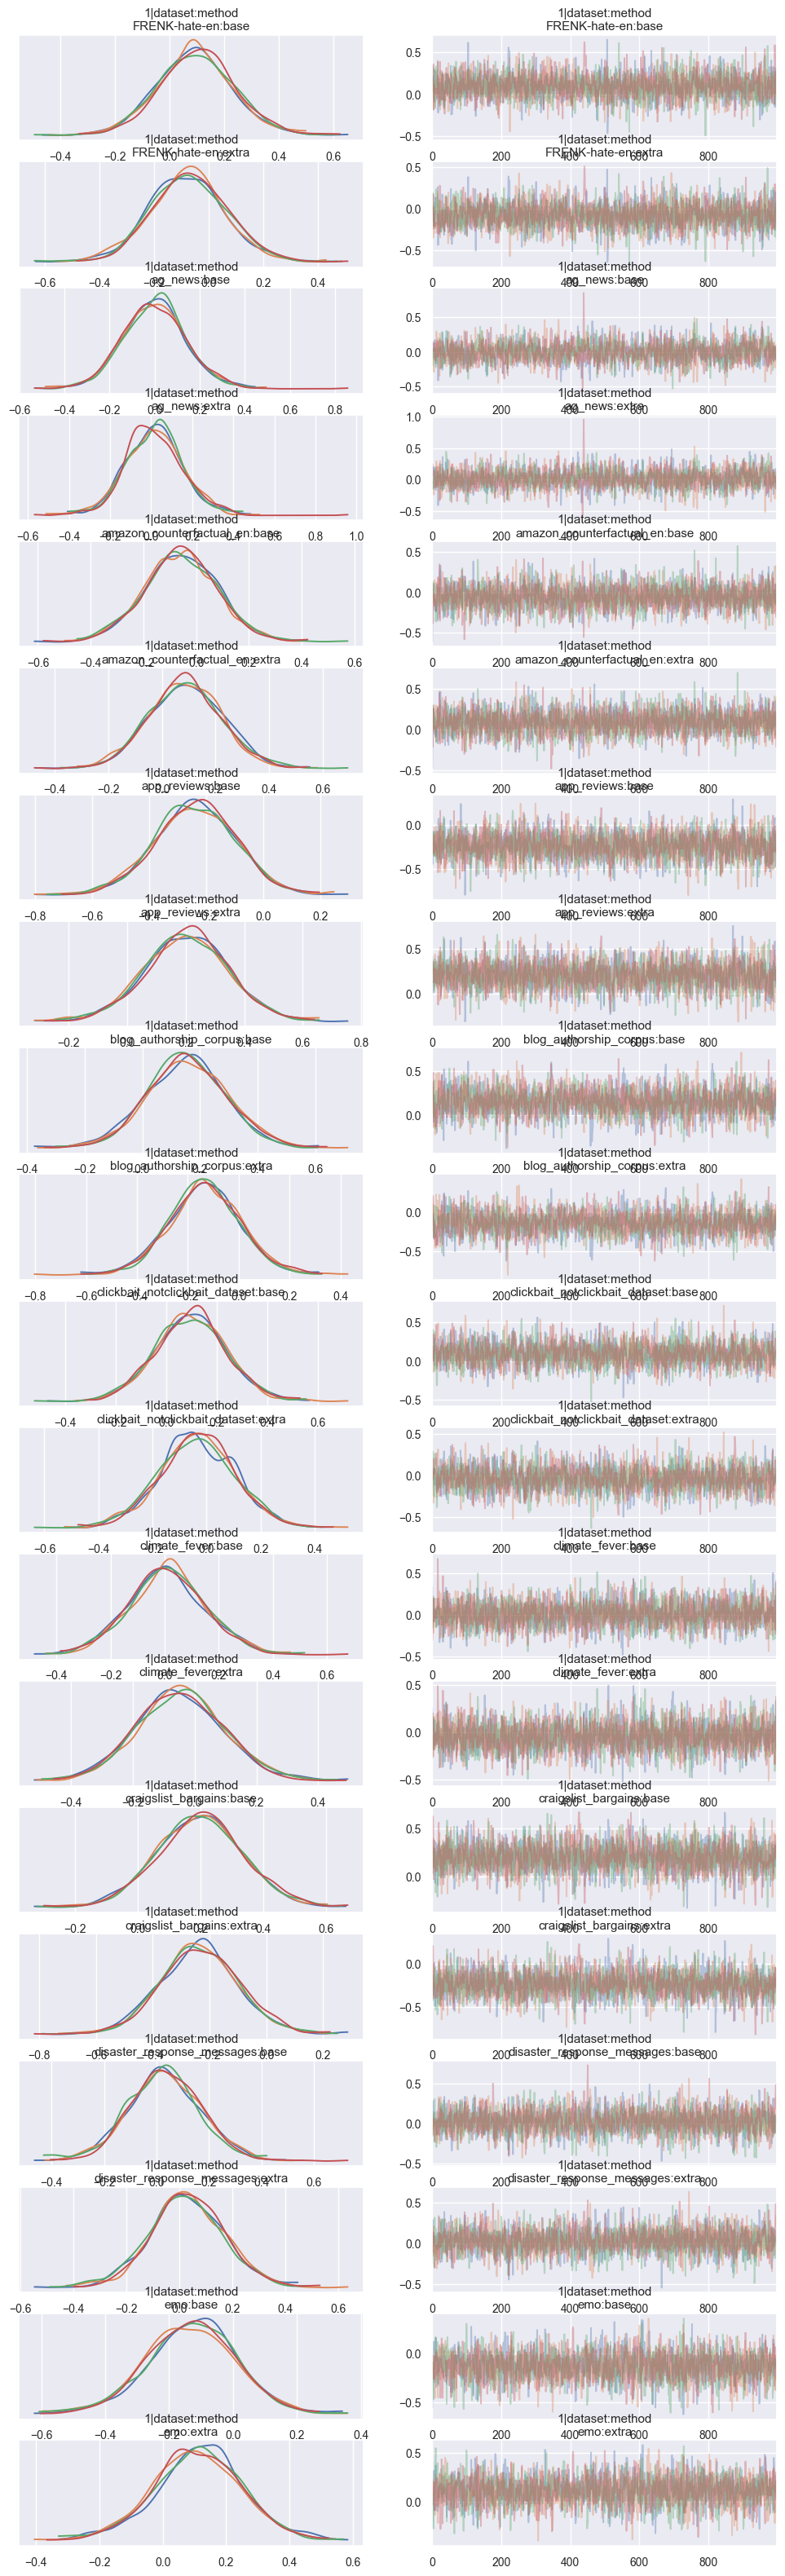

In [10]:
model_boost, summary_boost, az_summary_boost = utils.fit_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.002154 ┆ 0.001806 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.029909 ┆ 0.009393 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.00165,0.006701
"""ag_news""",-0.0041,0.007698
"""amazon_counterfactual_en""",-0.00355,0.02154
"""app_reviews""",0.0052,0.014507
"""blog_authorship_corpus""",-0.00005,0.005065
…,…,…
"""silicone""",-0.00895,0.015347
"""trec""",-0.0096,0.018099
"""tweets_hate_speech_detection""",-0.03615,0.018541
"""yahoo_answers_topics""",0.0005,0.003619


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.006032,0.012286
"""ag_news""",-0.005206,0.012621
"""amazon_counterfactual_en""",0.032205,0.042828
"""app_reviews""",0.111007,0.077644
"""blog_authorship_corpus""",0.002339,0.010071
…,…,…
"""silicone""",0.01292,0.038021
"""trec""",0.149942,0.18716
"""tweets_hate_speech_detection""",-0.034597,0.0307
"""yahoo_answers_topics""",0.031604,0.031039


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1044 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],-0.00696,0.02299,-0.04233,0.02903,0.00032,0.00033,5279.26191,3140.58308,1.00079
1|dataset:method[FRENK-hate-en:test],0.00762,0.02329,-0.02791,0.04510,0.00035,0.00034,4509.98045,2831.20535,1.00199
1|dataset:method[ag_news:extra],0.00280,0.02278,-0.03472,0.03655,0.00031,0.00036,5489.14526,3044.24612,1.00183
1|dataset:method[ag_news:test],-0.00209,0.02276,-0.03879,0.03263,0.00035,0.00036,4266.00312,2782.56820,1.00127
1|dataset:method[amazon_counterfactual_en:extra],0.00252,0.02383,-0.03710,0.03832,0.00033,0.00037,5234.03718,2961.98799,1.00132
1|dataset:method[amazon_counterfactual_en:test],-0.00169,0.02372,-0.04062,0.03426,0.00034,0.00038,4956.08465,2782.48989,1.00004
1|dataset:method[app_reviews:extra],-0.01308,0.02276,-0.05016,0.02272,0.00035,0.00029,4162.37486,3174.16340,1.00007
1|dataset:method[app_reviews:test],0.01440,0.02350,-0.02096,0.05373,0.00038,0.00032,3754.60993,2956.74275,1.00018
1|dataset:method[blog_authorship_corpus:extra],-0.00378,0.02309,-0.03961,0.03313,0.00030,0.00031,5787.22818,3298.67879,1.00037
1|dataset:method[blog_authorship_corpus:test],0.00424,0.02272,-0.03340,0.03857,0.00031,0.00031,5217.01585,3301.88729,1.00078


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


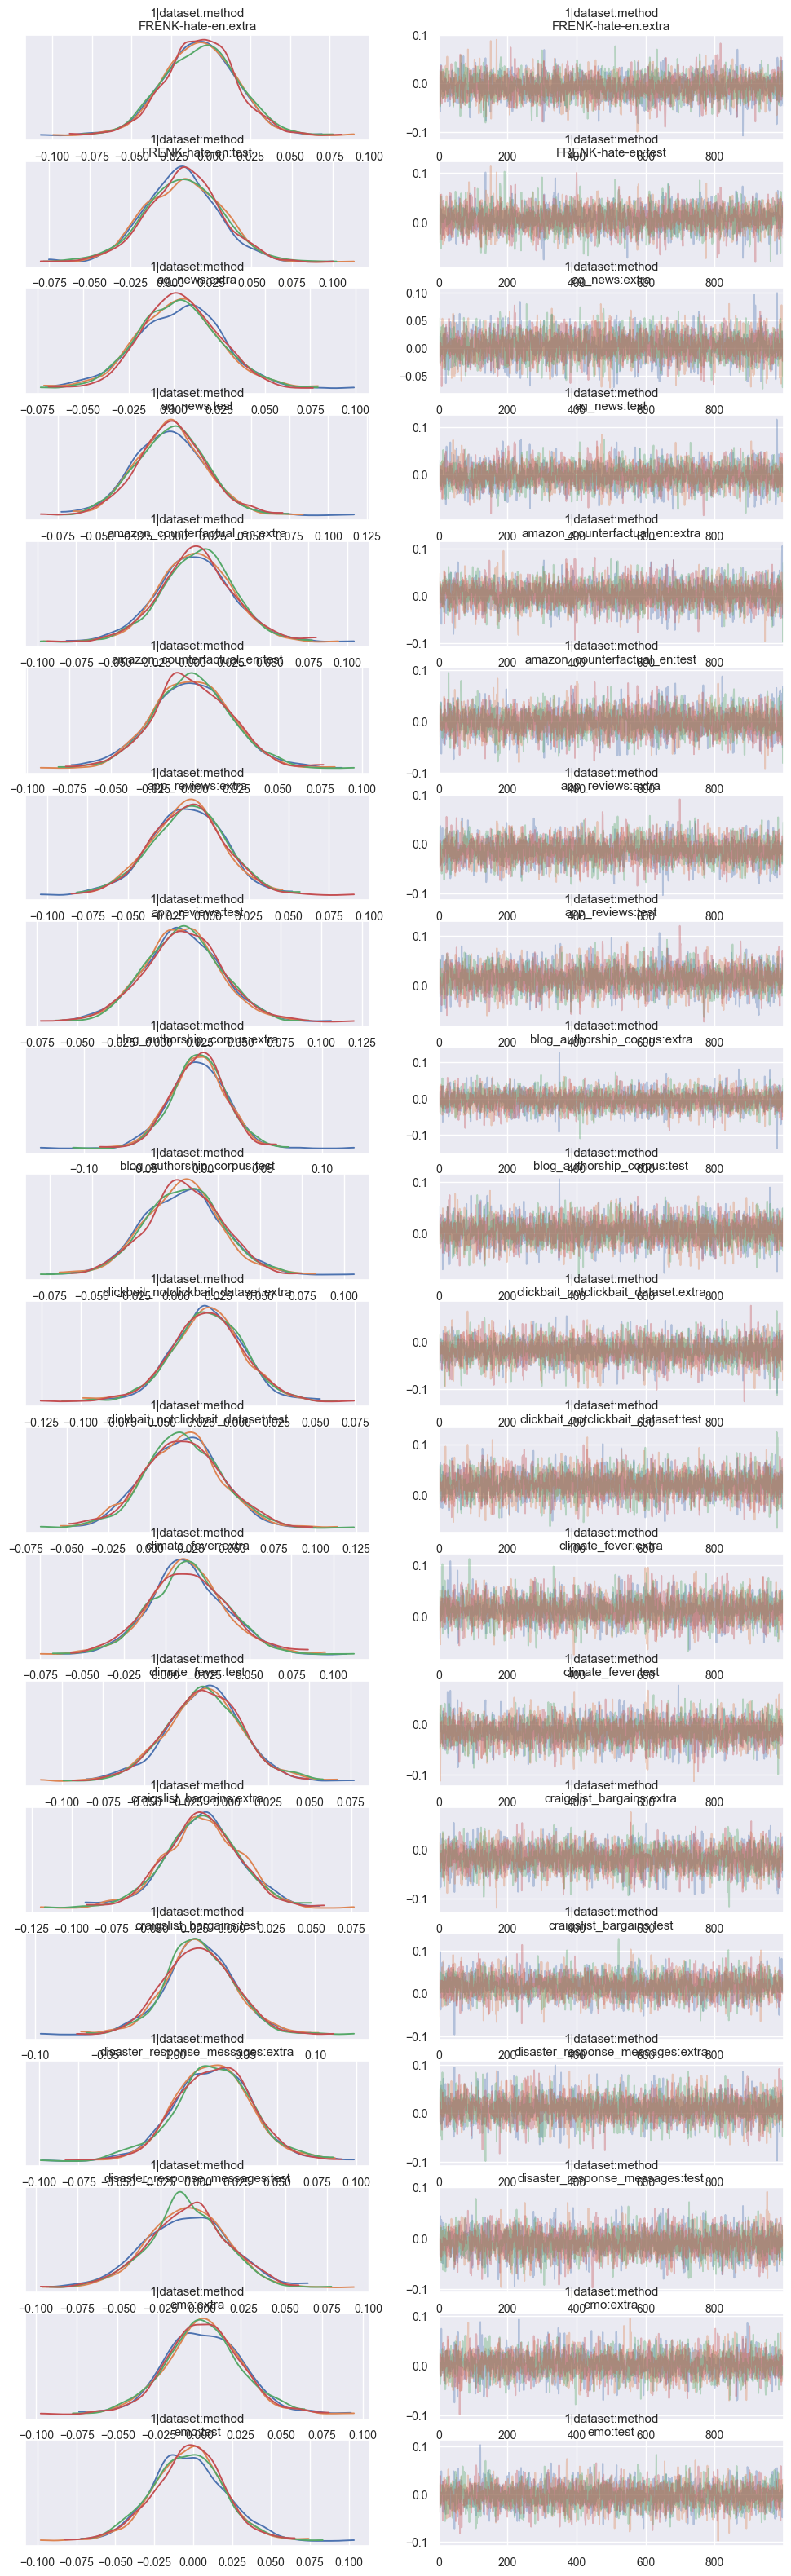

In [15]:
model_bias, summary_bias, az_summary_bias = utils.fit_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/m50/main_m50_n200_boost.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/m50/main_m50_n200_bias.nc'